In [73]:
import numpy as np
from uncertainties import ufloat
import uncertainties.unumpy as unp 

import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.constants as const

## Funktionen

In [74]:
def b_feld_spule(N, R, I):
    return const.mu_0 * (8*I*N/(np.sqrt(125)*R))

def B_fit(a,b,f):
    return a*f +b

## Konstanten

In [75]:
I_hor = 2.24 * 0.1 #Ampere
Erd = 3.85 
mu_B = const.value("Bohr magneton in Hz/T")
h = const.h
me = const.m_e
e = const.e
#Konstanten der Spulen

r_sweep = 0.1639 #Meter
N_sweep = 11
r_hor = 0.1579 #Meter
N_hor = 154
r_ver = 0.11735 #Meter
N_ver = 20

In [76]:
df_f = pd.read_csv('frequenz.csv')
print(df_f.keys())

#Fehler

df_f["I_sweep1"] = unp.uarray(df_f["I_sweep1"],[0.01])
df_f["I_sweep2"] = unp.uarray(df_f["I_sweep2"],[0.01])
df_f["I_hor1"] = unp.uarray(df_f["I_hor1"],[0.01])
df_f["I_hor2"] = unp.uarray(df_f["I_hor2"],[0.01])

df_f

Index(['f', 'I_sweep1', 'I_sweep2', 'I_hor1', 'I_hor2'], dtype='object')


,f,I_sweep1,I_sweep2,I_hor1,I_hor2
0,100,6.250+/-0.010,7.340+/-0.010,0.000+/-0.010,0.000+/-0.010
1,200,4.400+/-0.010,6.770+/-0.010,0.100+/-0.010,0.100+/-0.010
2,300,4.220+/-0.010,7.750+/-0.010,0.160+/-0.010,0.160+/-0.010
3,400,2.960+/-0.010,7.700+/-0.010,0.240+/-0.010,0.240+/-0.010
4,500,3.060+/-0.010,8.980+/-0.010,0.300+/-0.010,0.300+/-0.010
5,600,3.220+/-0.010,7.100+/-0.010,0.340+/-0.010,0.420+/-0.010
6,700,3.340+/-0.010,6.980+/-0.010,0.400+/-0.010,0.500+/-0.010
7,800,3.800+/-0.010,4.320+/-0.010,0.440+/-0.010,0.640+/-0.010
8,900,6.070+/-0.010,5.540+/-0.010,0.440+/-0.010,0.700+/-0.010
9,1000,7.830+/-0.010,7.100+/-0.010,0.480+/-0.010,0.740+/-0.010


## Magentfeld-Berechnung

In [77]:
df_f["B_1"] = b_feld_spule(N_sweep, r_sweep, df_f["I_sweep1"] * 0.1) + b_feld_spule(N_hor, r_hor, df_f["I_hor1"] * 0.3)
df_f["B_2"] = b_feld_spule(N_sweep, r_sweep, df_f["I_sweep2"] * 0.1) + b_feld_spule(N_hor, r_hor, df_f["I_hor2"] * 0.3)
df_f["I_sweep1"] = df_f["I_sweep1"]*0.1
df_f["I_sweep2"] = df_f["I_sweep2"]*0.1
df_f["I_hor1"] = df_f["I_hor1"]*0.3
df_f["I_hor2"] = df_f["I_hor2"]*0.3

In [78]:
df_f

,f,I_sweep1,I_sweep2,I_hor1,I_hor2,B_1,B_2
0,100,0.6250+/-0.0010,0.7340+/-0.0010,0.0000+/-0.0030,0.0000+/-0.0030,(3.77+/-0.26)e-05,(4.43+/-0.26)e-05
1,200,0.4400+/-0.0010,0.6770+/-0.0010,0.0300+/-0.0030,0.0300+/-0.0030,(5.29+/-0.26)e-05,(6.72+/-0.26)e-05
2,300,0.4220+/-0.0010,0.7750+/-0.0010,0.0480+/-0.0030,0.0480+/-0.0030,(6.76+/-0.26)e-05,(8.89+/-0.26)e-05
3,400,0.2960+/-0.0010,0.7700+/-0.0010,0.0720+/-0.0030,0.0720+/-0.0030,(8.10+/-0.26)e-05,0.0001096+/-0.0000026
4,500,0.3060+/-0.0010,0.8980+/-0.0010,0.0900+/-0.0030,0.0900+/-0.0030,(9.74+/-0.26)e-05,0.0001331+/-0.0000026
5,600,0.3220+/-0.0010,0.7100+/-0.0010,0.1020+/-0.0030,0.1260+/-0.0030,0.0001089+/-0.0000026,0.0001533+/-0.0000026
6,700,0.3340+/-0.0010,0.6980+/-0.0010,0.1200+/-0.0030,0.1500+/-0.0030,0.0001254+/-0.0000026,0.0001737+/-0.0000026
7,800,0.3800+/-0.0010,0.4320+/-0.0010,0.1320+/-0.0030,0.1920+/-0.0030,0.0001387+/-0.0000026,0.0001944+/-0.0000026
8,900,0.6070+/-0.0010,0.5540+/-0.0010,0.1320+/-0.0030,0.2100+/-0.0030,0.0001524+/-0.0000026,0.0002176+/-0.0000026
9,1000,0.7830+/-0.0010,0.7100+/-0.0010,0.1440+/-0.0030,0.2220+/-0.0030,0.0001735+/-0.0000026,0.0002375+/-0.0000026


In [79]:
print((df_f["I_sweep1"].to_numpy()))

[0.625+/-0.001 0.44000000000000006+/-0.001 0.422+/-0.001 0.296+/-0.001
 0.30600000000000005+/-0.001 0.32200000000000006+/-0.001 0.334+/-0.001
 0.38+/-0.001 0.6070000000000001+/-0.001 0.783+/-0.001]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


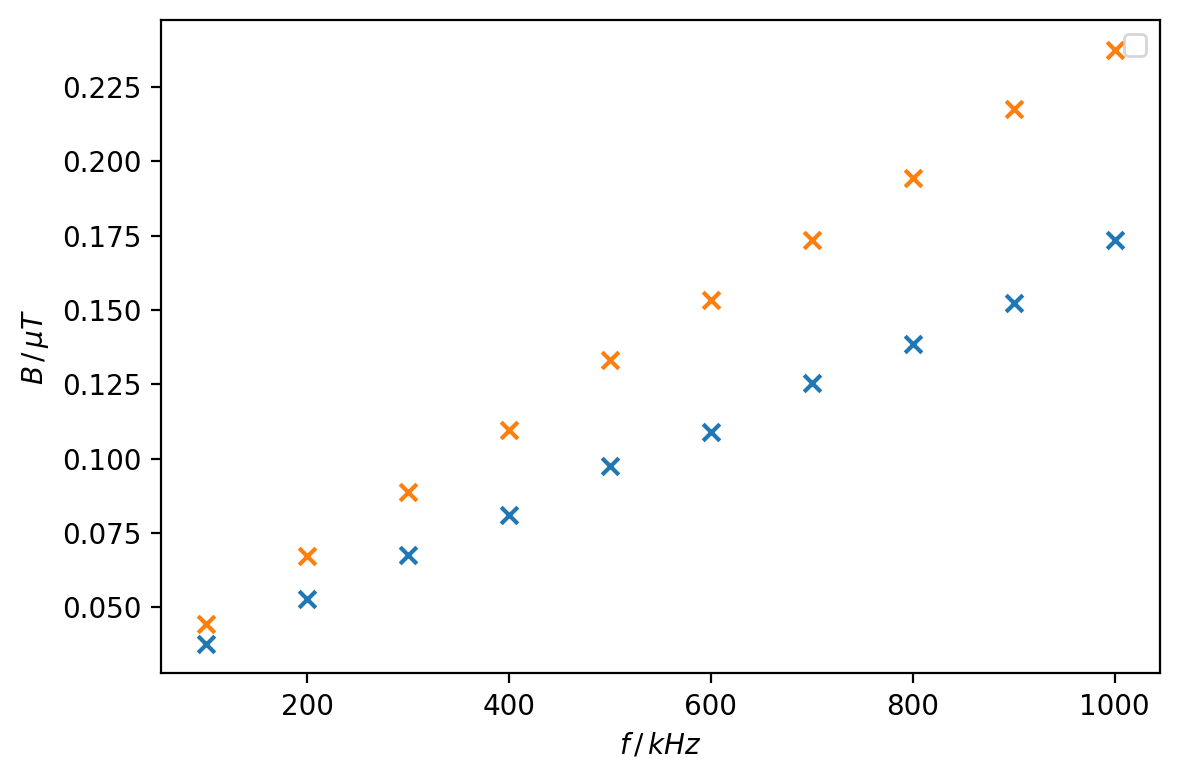

In [80]:
plt.figure(figsize=(6,4), dpi=200)
#plt.errorbar(df_f["f"], unp.nominal_values(T_p), yerr=unp.std_devs(T_p),  fmt='bx', label='sample')
plt.scatter(df_f["f"].to_numpy(), unp.nominal_values(df_f["B_1"].to_numpy()) * 1000, marker = "x")
plt.scatter(df_f["f"].to_numpy(), unp.nominal_values(df_f["B_2"].to_numpy()) * 1000,  marker = "x")
plt.ylabel(r'$B \,/\, \mu T$')
plt.xlabel(r'$f \,/\, kHz$')
plt.legend()
plt.tight_layout()
plt.show()

In [81]:
params1, cov1 = curve_fit(B_fit, df_f["f"].to_numpy() * 1000, unp.nominal_values(df_f["B_1"].to_numpy()))
uncertainties1 = np.sqrt(np.diag(cov1))

b1 = ufloat(params1[0], uncertainties1[0])
a1 = ufloat(params1[1], uncertainties1[1])

print("a1: ", a1)
print("b1: ", b1)

params2, cov2 = curve_fit(B_fit, df_f["f"].to_numpy() * 1000 , unp.nominal_values(df_f["B_2"].to_numpy()), sigma = unp.std_devs(df_f["B_2"].to_numpy()), absolute_sigma = True)
uncertainties2 = np.sqrt(np.diag(cov2))

b2 = ufloat(params2[0], uncertainties2[0])
a2 = ufloat(params2[1], uncertainties2[1])

print("a2: ", a2)
print("b2: ", b2)

a1:  (1.466+/-0.022)e-10
b1:  (2.29+/-0.13)e-05
a2:  (2.141+/-0.029)e-10
b2:  (2.42+/-0.18)e-05


In [82]:
print(unp.nominal_values(a1))

1.4662848186935045e-10


In [122]:
\usepackage[
version=4,
math-greek=default,
text-greek=default,
]{mhchem}


SyntaxError: unexpected character after line continuation character (3375796930.py, line 1)

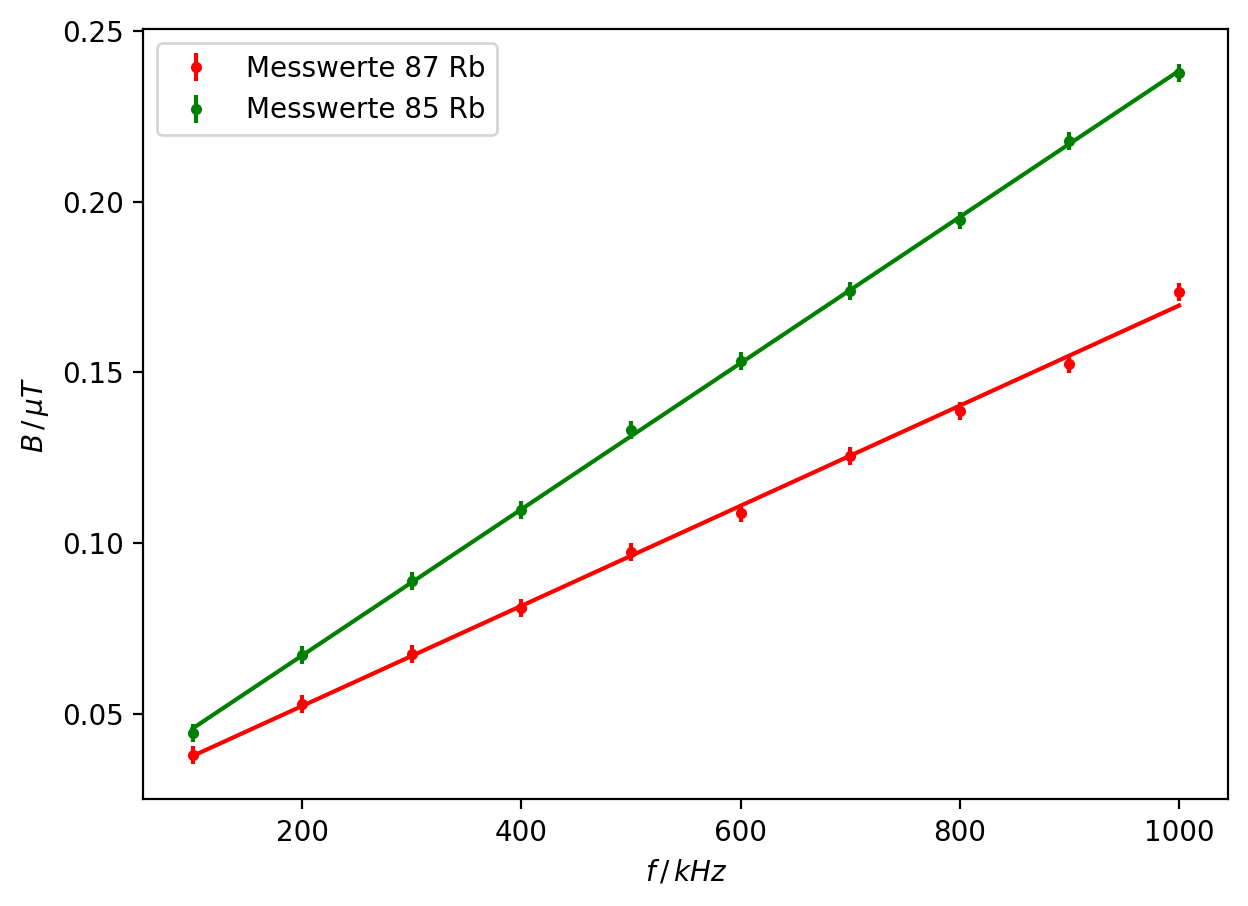

In [128]:
f_lin = np.linspace(df_f['f'].min(), df_f['f'].max(), 100)

plt.figure(figsize=(7,5),dpi=200)

plt.errorbar(df_f["f"].to_numpy(), unp.nominal_values(df_f["B_1"].to_numpy())*1000, yerr=unp.std_devs(df_f["B_1"].to_numpy())*1000,  fmt='r.', label='Messwerte 87 Rb')
plt.errorbar(df_f["f"].to_numpy(), unp.nominal_values(df_f["B_2"].to_numpy())*1000, yerr=unp.std_devs(df_f["B_2"].to_numpy())*1000,  fmt='g.', label='Messwerte 85 Rb')
plt.plot(f_lin, B_fit(unp.nominal_values(a1), unp.nominal_values(b1) , f_lin*1000)*1000, 'r-')
plt.plot(f_lin, B_fit(unp.nominal_values(a2),unp.nominal_values(b2),f_lin*1000)*1000, 'g-')
plt.ylabel(r'$B \,/\, \mu T$')
plt.xlabel(r'$f \,/\, kHz$')
plt.legend()
plt.savefig('../plots/frequenz.pdf')

## Berechnung der Lande Faktoren

In [84]:
g_f1 = me/e * 4*np.pi * 1/a1
print(g_f1)

g_f2 = me/e * 4*np.pi * 1/a2
print(g_f2)

0.487+/-0.007
0.334+/-0.005


## Berechnung der Kern-Spins

In [85]:
def kernspin(gf):
    return -1+(2/(4*gf))+(  (1-(2/(4*gf)))**2 - (3/4)*(1-(2/gf)))**(1/2)

print(kernspin(g_f1))
print(kernspin(g_f2))

1.552+/-0.030
2.50+/-0.04


## Berechnung des Erdmagnetfelds

In [86]:
B_erd = np.mean([b1,b2])
print(B_erd)

(2.36+/-0.11)e-05


In [87]:
#Verhältnis der Signalbildamplituden
R = ufloat(0.51,0.02)

def verhältnis(R):
    p1 = R/(1+R)
    return p1, 1-p1

print(verhältnis(R))

#Verhältnis also P1 und P2 = Rb87 und Rb85 = 1/3 und 2/3 = 1 : 2
#In echt ist es: P1 und P2 = 1/4 und 3/4 und 1/3

(0.33774834437086093+/-0.008771545107670718, 0.6622516556291391+/-0.008771545107670718)


## Quadratischer Zeeman-Effekt

In [88]:
#Abschätzen von delta E

rb_87 = 4.53e-24 #Joule
rb_85 = 2.01e-24 #Joule

def zeeman(B,gf,M,dE):
    lin = gf * mu_B * B
    quad = lin**2 * ((1 - 2*M)/(dE))
    return lin,quad

P1_lin, P1_quad = zeeman(0.25e-03, 1/2 ,2 ,rb_87)
P2_lin, P2_quad = zeeman(0.25e-03, 1/3 ,3 ,rb_85) #Hä warum dieses B Feld?

print(P1_quad)
print(P2_quad)

-2.0270578674596946e+36
-3.384032481884067e+36


In [89]:
df_a = pd.read_csv('amplitude.csv')

print(df_a)

df_a["peak2"] = df_a["peak2"]*10**-3
df_a["peak1"] = df_a["peak1"]*10**-3

print(df_a)

       A  peak2  peak1
0    1.0   6.00   4.70
1    1.5   4.40   3.16
2    2.0   3.40   2.40
3    2.5   2.80   1.92
4    3.0   2.40   1.68
5    3.5   2.00   1.44
6    4.0   1.90   1.26
7    4.5   1.50   1.12
8    5.0   1.48   0.99
9    6.0   1.20   0.84
10   8.0   0.88   0.60
11  10.0   0.72   0.47
       A    peak2    peak1
0    1.0  0.00600  0.00470
1    1.5  0.00440  0.00316
2    2.0  0.00340  0.00240
3    2.5  0.00280  0.00192
4    3.0  0.00240  0.00168
5    3.5  0.00200  0.00144
6    4.0  0.00190  0.00126
7    4.5  0.00150  0.00112
8    5.0  0.00148  0.00099
9    6.0  0.00120  0.00084
10   8.0  0.00088  0.00060
11  10.0  0.00072  0.00047


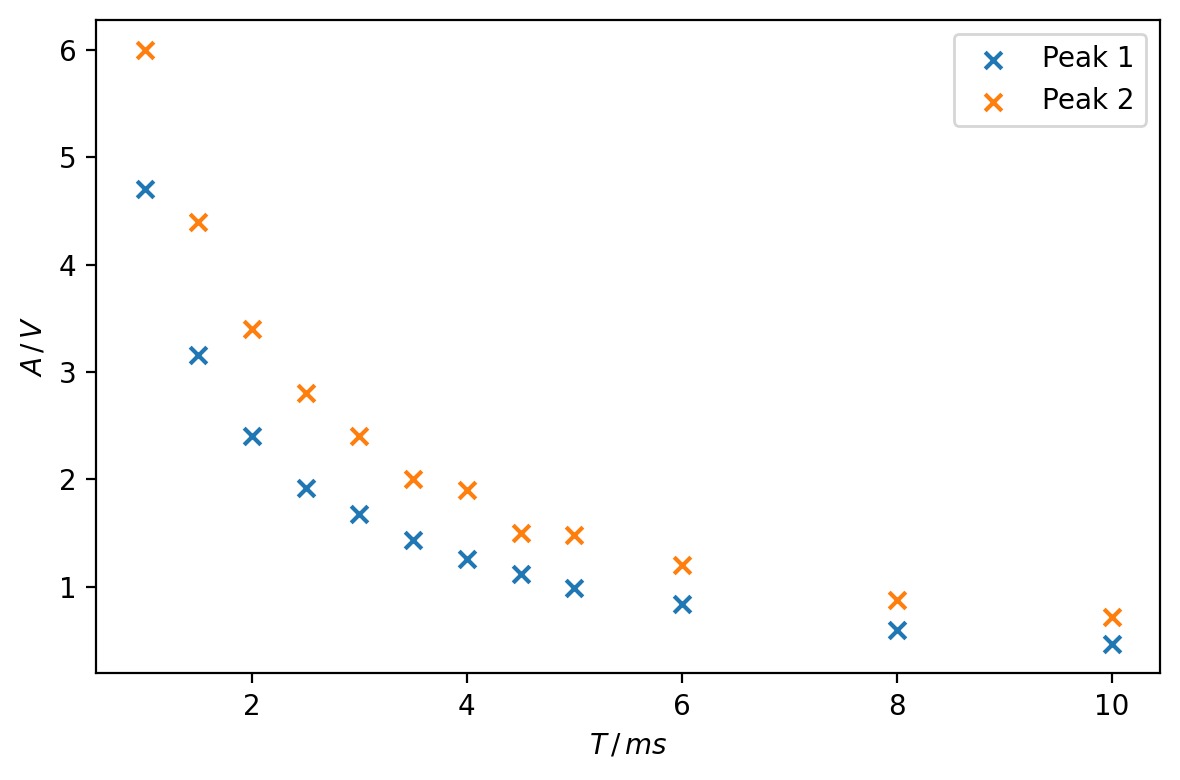

In [90]:
plt.figure(figsize=(6,4), dpi=200)

plt.scatter(df_a["A"].to_numpy(), df_a["peak1"].to_numpy()*1000, marker = "x", label = "Peak 1")
plt.scatter(df_a["A"].to_numpy(), df_a["peak2"].to_numpy()*1000, marker = "x", label = "Peak 2")
plt.ylabel(r'$A \,/\, V$')
plt.xlabel(r'$T \,/\, ms$')
plt.legend()
plt.tight_layout()
plt.show()

In [110]:
def a_fit(x,a,b,c):
    return a + b/(x-c)

bound = ((-50, -50),(50, 50))
p0 = (5,2)

data1 = df_a["peak1"].to_numpy()
data2 = df_a["peak2"].to_numpy()
spannung = df_a["A"].to_numpy()

errors = np.ones(np.size(data1))*0.01


params3, cov3 = curve_fit(a_fit, spannung, data1, sigma = errors, absolute_sigma = True, p0=(0,3,0))
uncertainties3 = np.sqrt(np.diag(cov3))

a3 = ufloat(params3[0], uncertainties3[0])
b3 = ufloat(params3[1], uncertainties3[1])
c3 = ufloat(params3[2], uncertainties3[2])

print("a3: ", a3)
print("b3: ", b3)
print("c3: ", c3)

#params4, cov4 = curve_fit(a_fit, df_a["A"].to_numpy(), df_a["peak2"].to_numpy()*1000, p0 = p0)
#uncertainties4 = (np.diag(cov4))**(1/2)
#
#a4 = ufloat(params4[0], uncertainties4[0])
#b4 = ufloat(params4[1], uncertainties4[1])
##c3 = ufloat(params3[2], uncertainties3[2])
#
#print("a4: ", a4)
#print("b4: ", b4)
##print("c3: ", c3)
#
##, bounds=((0,0,0.5),(1,2.1,0.9))
##,unp.nominal_values(c3)


a3:  0.000+/-0.010
b3:  0.00+/-0.05
c3:  -0+/-10


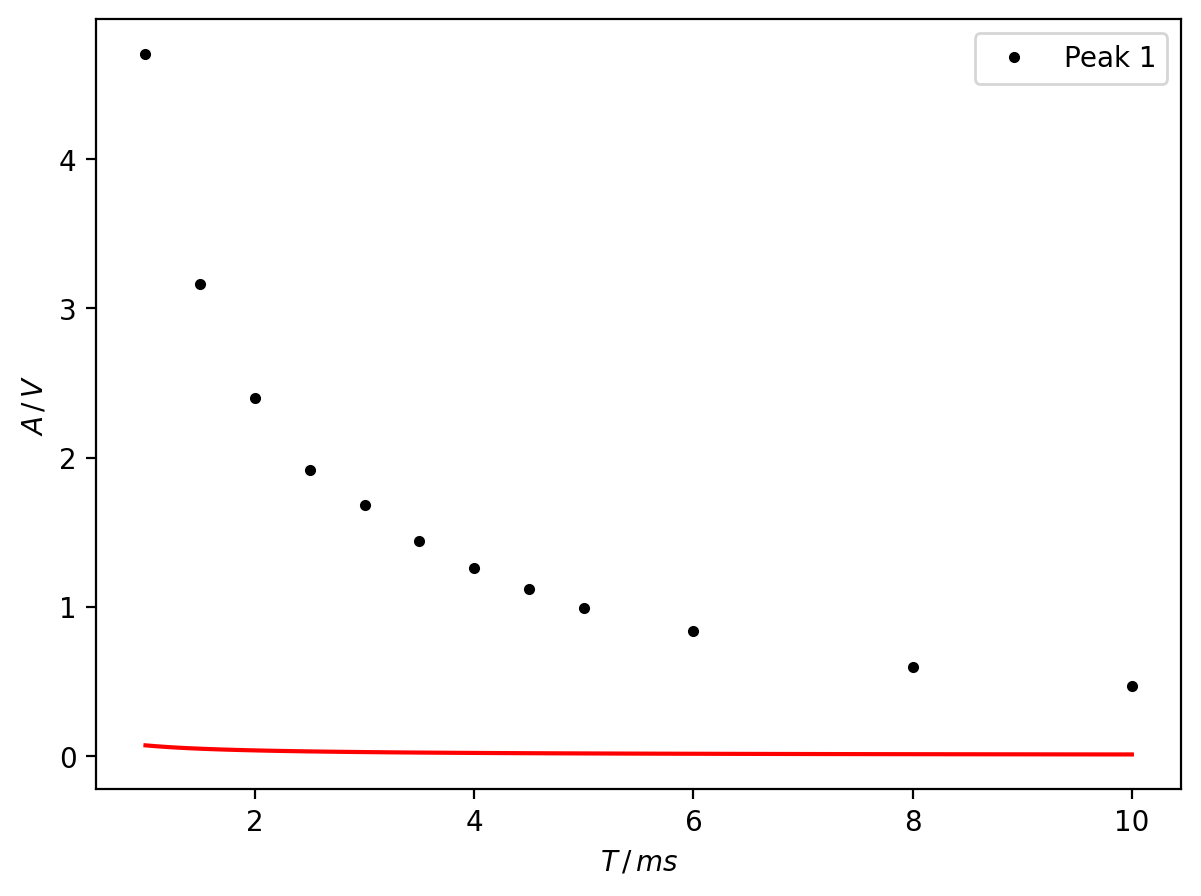

In [109]:
a_lin = np.linspace(spannung.min(), spannung.max(), 100)

plt.figure(figsize=(7,5),dpi=200)

plt.errorbar(spannung, data1*1000,  fmt='k.', label='Peak 1')
#plt.errorbar(df_a["A"].to_numpy(), df_a["peak2"].to_numpy()*1000,  fmt='b.', label='Peak 2')
plt.plot(a_lin, a_fit(unp.nominal_values(a3), unp.nominal_values(b3), unp.nominal_values(c3), a_lin), 'r-')
#plt.plot(a_lin, a_fit(unp.nominal_values(a4), unp.nominal_values(b4) , a_lin), 'g-')
#plt.plot(a_lin, a_fit(0.5,2, a_lin), 'r-')
plt.ylabel(r'$A \,/\, V$')
plt.xlabel(r'$T \,/\, ms$')
plt.legend()